In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Logistic regression is used in predicting the categorical varaiable
import sklearn.metrics as mt
path=r'F:\Data_science_with_python\Day_13\dm.csv'
dm_data=pd.read_csv(path)
dm_data['Target']=dm_data['AmountSpent'].map(lambda x: 1 if x>1216.77 else 0 )
dm_data_new=dm_data.drop(['AmountSpent','Cust_Id'], axis=1)
dm_data_new['History']=dm_data_new['History'].fillna('NewCustomer')
dm_data_new['AgeNew']=dm_data_new['Age'].map(lambda x: 1 if x!='Young' else 0)
dm_data_new['ChildrenNew']=dm_data_new['Children'].map(lambda x: 1 if x<=1 else 0)
dm_data_new_train=dm_data_new.sample(frac=0.7, random_state=200)
dm_data_new_test=dm_data_new.drop(dm_data_new_train.index)

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula='Target~Gender+OwnHome+Married+Location+Salary+AgeNew+ChildrenNew+History+Catalogs'
# glm = to build all inds of models
train_model=smf.glm(formula,data=dm_data_new_train,family=sm.families.Binomial()).fit() # Binomial is for logistic regression

In [4]:
print(train_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      688
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -164.38
Date:                Mon, 22 Jul 2019   Deviance:                       328.76
Time:                        10:02:23   Pearson chi2:                     387.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -9

In [5]:
dm_data_new_train['History_dummy']=dm_data_new_train['History'].map(lambda x:1 if x=='Medium' else 0)
dm_data_new_test['History_dummy']=dm_data_new_test['History'].map(lambda x:1 if x=='Medium' else 0)

In [6]:
formula_new='Target~Location+History_dummy+Salary+AgeNew+ChildrenNew+Catalogs'
train_model_2=smf.glm(formula_new,data=dm_data_new_train,family=sm.families.Binomial()).fit() 
print(train_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      693
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -198.58
Date:                Mon, 22 Jul 2019   Deviance:                       397.16
Time:                        10:02:55   Pearson chi2:                     819.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.8124      0.881    -

In [7]:
## multicollinaerity --> compute VIF (Varience)
# ROC and AUC
Probabily_of_high_spending=train_model_2.predict(dm_data_new_train)

In [8]:
mt.roc_auc_score(dm_data_new_train['Target'],Probabily_of_high_spending)

0.9466205145362053

In [9]:
fpr, tpr, thresholds=mt.roc_curve(dm_data_new_train['Target'],Probabily_of_high_spending) # fpr - false possitve rate, tpr - true positive 

In [10]:
thresholds

array([1.99978711e+00, 9.99787114e-01, 9.91494738e-01, 9.91441960e-01,
       9.62747246e-01, 9.62715977e-01, 9.60731053e-01, 9.59349513e-01,
       9.02097198e-01, 8.99404328e-01, 8.98668074e-01, 8.95315391e-01,
       8.88740522e-01, 8.37875386e-01, 8.26585495e-01, 8.23146021e-01,
       8.21367459e-01, 8.08404207e-01, 8.02796030e-01, 8.02732487e-01,
       7.99987667e-01, 7.95875135e-01, 7.92887100e-01, 7.76391122e-01,
       7.75319069e-01, 7.50765597e-01, 7.49394419e-01, 7.24482401e-01,
       7.22995356e-01, 7.11061199e-01, 6.99729793e-01, 6.92050519e-01,
       6.88550444e-01, 6.84274230e-01, 6.78525775e-01, 6.77457796e-01,
       6.72662155e-01, 6.72513778e-01, 6.64483328e-01, 6.49260461e-01,
       6.43664936e-01, 6.24627019e-01, 6.02249034e-01, 5.98029649e-01,
       5.44416341e-01, 5.42543335e-01, 5.41003532e-01, 5.35393142e-01,
       5.18373224e-01, 5.14798742e-01, 4.98390458e-01, 4.96662201e-01,
       4.96081496e-01, 4.84799082e-01, 4.79938887e-01, 4.77257686e-01,
      

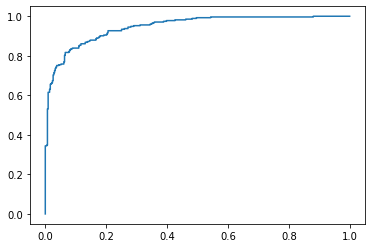

In [11]:
plt.plot(fpr, tpr,'-');

In [12]:
hr_path=r'F:\Data_science_with_python\Day_18\HR_comma_sep.csv'

In [34]:
hr_data=pd.read_csv(hr_path)

In [35]:
hr_data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2686,0.50,0.96,4,147,3,0,0,0,sales,low
13141,0.80,0.82,4,271,4,0,0,0,sales,low
8679,0.95,0.90,3,259,2,0,0,0,support,low
7792,0.83,0.68,4,198,3,0,0,0,marketing,medium
10147,0.55,0.55,5,256,3,0,0,0,RandD,medium


In [15]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [18]:
hr_data['left'].unique()

array([1, 0], dtype=int64)

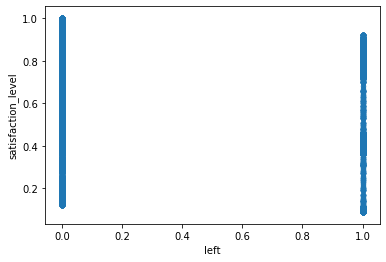

In [22]:
hr_data.plot(x='left',y='satisfaction_level',kind='scatter')

In [23]:
# if the distribution of the satisfaction level is different for 0 and 1 of the group
hr_data.groupby('left').agg({'satisfaction_level':['mean','median']})
# People less satisfied leave the organization more than the people having higher satisffaction level

satisfaction_level       
                   mean median
left                          
0              0.666810   0.69
1              0.440098   0.41

In [24]:
hr_data.groupby('left').agg({'last_evaluation':['mean','median']}) # no relation with the target variable

last_evaluation       
                mean median
left                       
0           0.715473   0.71
1           0.718113   0.79

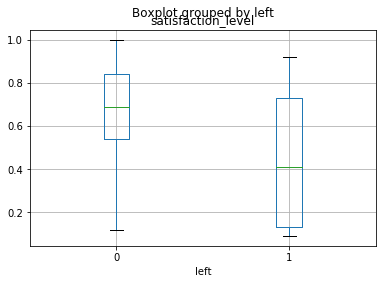

In [28]:
hr_data.boxplot(column='satisfaction_level',by='left')

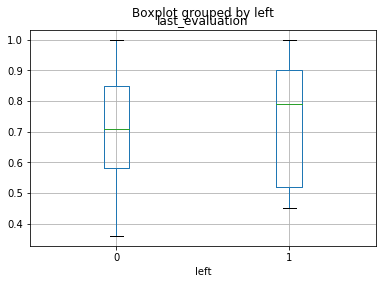

In [29]:
hr_data.boxplot(column='last_evaluation',by='left')

In [30]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [31]:
hr_data['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [32]:
# number_project is a categorical variable
# to check its relation with target variable
hr_data.groupby(['left','number_project']).agg({'number_project':'count'})

number_project
left number_project                
0    2                          821
     3                         3983
     4                         3956
     5                         2149
     6                          519
1    2                         1567
     3                           72
     4                          409
     5                          612
     6                          655
     7                          256

In [36]:
# create 2 dummy vriables based on the above table
hr_data['num_pro_2_7']=hr_data['number_project'].map(lambda x:1 if x==2 or x==7 else 0)

In [37]:
hr_data['num_pro_7']=hr_data['number_project'].map(lambda x:1 if x==7 else 0)
hr_data['num_pro_2']=hr_data['number_project'].map(lambda x:1 if x==2 else 0)
hr_data['num_pro_3_6']=hr_data['number_project'].map(lambda x:1 if x<=6 and x>=3 else 0)

In [39]:
hr_data.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,num_pro_2_7,num_pro_7,num_pro_2,num_pro_3_6
8760,0.52,1.00,4,221,3,0,0,0,technical,medium,0,0,0,1
9223,0.68,0.55,6,181,3,0,0,0,IT,medium,0,0,0,1
3971,0.20,0.97,6,224,5,1,0,0,support,medium,0,0,0,1


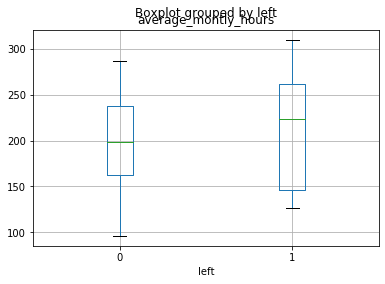

In [40]:
hr_data.boxplot(column='average_montly_hours',by='left')
# leave average_montly_hours from model prediction

In [41]:
hr_data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [42]:
hr_data.groupby(['left','time_spend_company']).agg({'time_spend_company':'count'})

time_spend_company
left time_spend_company                    
0    2                                 3191
     3                                 4857
     4                                 1667
     5                                  640
     6                                  509
     7                                  188
     8                                  162
     10                                 214
1    2                                   53
     3                                 1586
     4                                  890
     5                                  833
     6                                  209

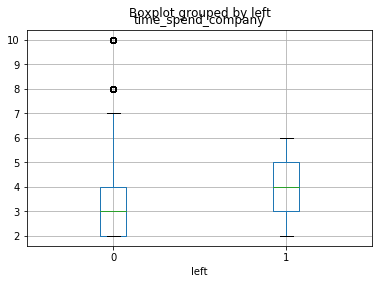

In [43]:
hr_data.boxplot(column='time_spend_company',by='left')

In [44]:
hr_data['Work_accident'].unique()

array([0, 1], dtype=int64)

In [45]:
hr_data.groupby('left').agg({'Work_accident':['mean','median']}) 

Work_accident       
              mean median
left                     
0         0.175009      0
1         0.047326      0

In [46]:
hr_data.groupby(['left','Work_accident']).agg({'Work_accident':'count'})

Work_accident
left Work_accident               
0    0                       9428
     1                       2000
1    0                       3402
     1                        169

In [49]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'num_pro_2_7', 'num_pro_7',
       'num_pro_2', 'num_pro_3_6'],
      dtype='object')

In [50]:
hr_data.groupby(['left','promotion_last_5years']).agg({'promotion_last_5years':'count'})

promotion_last_5years
left promotion_last_5years                       
0    0                                      11128
     1                                        300
1    0                                       3552
     1                                         19

In [51]:
hr_data.groupby(['left','salary']).agg({'salary':'count'})

salary
left salary        
0    high      1155
     low       5144
     medium    5129
1    high        82
     low       2172
     medium    1317

In [52]:
hr_data.groupby(['left','sales']).agg({'sales':'count'})

sales
left sales             
0    IT             954
     RandD          666
     accounting     563
     hr             524
     management     539
     marketing      655
     product_mng    704
     sales         3126
     support       1674
     technical     2023
1    IT             273
     RandD          121
     accounting     204
     hr             215
     management      91
     marketing      203
     product_mng    198
     sales         1014
     support        555
     technical      697

In [54]:
hr_data_train=hr_data.sample(frac=0.70, random_state=200)

In [55]:
hr_data_test=hr_data.drop(hr_data_train.index, axis=0)

In [56]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'num_pro_2_7', 'num_pro_7',
       'num_pro_2', 'num_pro_3_6'],
      dtype='object')

In [57]:
formula='''left~satisfaction_level+last_evaluation+num_pro_2_7+time_spend_company+salary+sales'''

In [58]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [63]:
model1=smf.glm(formula, family=sm.families.Binomial(),data=hr_data_train).fit()

In [64]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10483
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3700.1
Date:                Mon, 22 Jul 2019   Deviance:                       7400.1
Time:                        11:23:35   Pearson chi2:                 9.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.5592 

In [66]:
# create dummies
hr_data_train['sales_r_and_d']=hr_data['sales'].map(lambda x:1 if x == 'RandD' else 0)
hr_data_test['sales_r_and_d']=hr_data['sales'].map(lambda x:1 if x == 'RandD' else 0)

hr_data_train['sales_hr']=hr_data['sales'].map(lambda x:1 if x == 'hr' else 0)
hr_data_test['sales_hr']=hr_data['sales'].map(lambda x:1 if x == 'hr' else 0)

hr_data_train['sales_mgmt']=hr_data['sales'].map(lambda x:1 if x == 'management' else 0)
hr_data_test['sales_mgmt']=hr_data['sales'].map(lambda x:1 if x == 'management' else 0)

hr_data_train['sales_tech']=hr_data['sales'].map(lambda x:1 if x == 'technical' else 0)
hr_data_test['sales_tech']=hr_data['sales'].map(lambda x:1 if x == 'technical' else 0)

In [67]:
formula_new='''left~satisfaction_level+last_evaluation+num_pro_2_7+time_spend_company+salary+sales_r_and_d+sales_hr+sales_mgmt+sales_tech'''
model2=smf.glm(formula_new, family=sm.families.Binomial(),data=hr_data_train).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10488
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3703.7
Date:                Mon, 22 Jul 2019   Deviance:                       7407.5
Time:                        11:28:46   Pearson chi2:                 9.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.4889      0

In [68]:
## AUC
prob_left=model2.predict(hr_data_train)

In [69]:
import sklearn.metrics as metrics
metrics.roc_auc_score(hr_data_train['left'],prob_left)

0.8962652087464142

In [71]:
prob_left_test=model2.predict(hr_data_test)
metrics.roc_auc_score(hr_data_test['left'],prob_left_test)

0.8849817438899747

In [73]:
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
y,x=patsy.dmatrices(formula,data=hr_data_train,return_type='dataframe')

In [76]:
x.head(5)

,Intercept,salary[T.low],salary[T.medium],sales[T.RandD],sales[T.accounting],sales[T.hr],sales[T.management],sales[T.marketing],sales[T.product_mng],sales[T.sales],sales[T.support],sales[T.technical],satisfaction_level,last_evaluation,num_pro_2_7,time_spend_company
11291,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.62,0.91,0.0,10.0
6315,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.76,0.65,0.0,3.0
9333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,0.85,0.0,3.0
5519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.98,0.57,0.0,3.0
7816,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.88,0.0,4.0


In [77]:
variance_inflation_factor(x.values,0) # intercept

57.463319627975956

In [78]:
variance_inflation_factor(x.values,1)

3.708486334423802

In [79]:
variance_inflation_factor(x.values,2)

3.6711767817089025

In [80]:
variance_inflation_factor(x.values,3)

1.5460579879255314

In [81]:
[variance_inflation_factor(x.values,i) for i in range(0,x.shape[1])]

[57.463319627975956,
 3.708486334423802,
 3.6711767817089025,
 1.5460579879255314,
 1.5382606864950965,
 1.5037527874720067,
 1.5070607205368054,
 1.6019358644515633,
 1.587322011866912,
 3.1400281974657154,
 2.3892236486174205,
 2.562603691402671,
 1.1382452134834338,
 1.1361271245412699,
 1.246669633162476,
 1.0572343299176679]